# Optimized AI detection model created by B.Kishore

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

Text(0.5, 1.0, 'Generated Text')

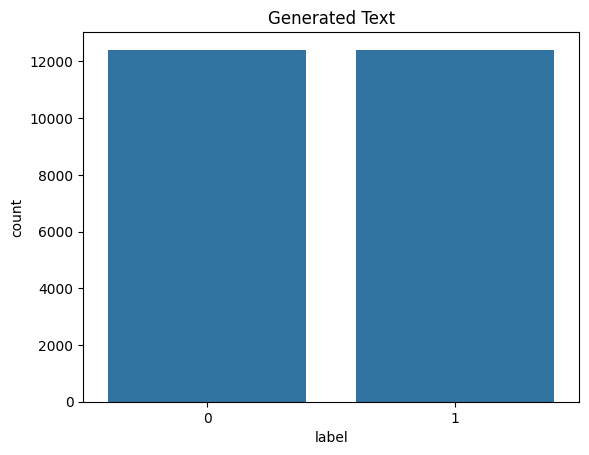

In [2]:
# I cleaned the data beforehand
data=pd.read_csv("D:/kaggle/final_data.csv")
sns.countplot(data=data, x="label").set_title("Generated Text")

In [3]:
data

,Unnamed: 0,text,label,source,prompt
0,40745,It would be so much better if no one drove a c...,0,persuade_corpus,NaN
1,3665,People should make their own decisions to avoi...,0,original_moth,Task: \n\nWrite an essay about why people shou...
2,17386,"Dear Principle,\n\nFebruary 9th, 2011\n\nI hav...",0,persuade_corpus,NaN
3,8119,All students should participate in extracurric...,0,persuade_corpus,NaN
4,15309,Fellow citizens should know the advantages of ...,0,persuade_corpus,NaN
...,...,...,...,...,...
24823,42190,I think our principal's idea of making us do e...,1,llama_70b_v1,Your principal has decided that all students m...
24824,42191,I think it's a good idea for schools to have o...,1,falcon_180b_v1,Some schools have implemented policies that al...
24825,42196,Students often debate whether inactivity or s...,1,mistral7binstruct_v2,\nTask: Research the benefits of staying occup...
24826,42199,Advantages of Limiting Car Usage\n\nLimiting c...,1,radek_500,NaN


In [ ]:
# Finding the maximum length of words repeated in the column to limit the preprocessing

In [3]:
df= data['text'].apply(lambda x: len(x.split()))


Text(0.5, 0.98, 'Distribution of the text length')

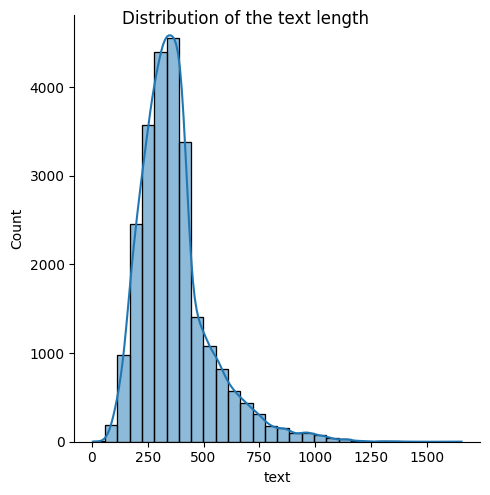

In [4]:
len=sns.displot(df,bins=30,kde=True)
len.fig.suptitle("Distribution of the text length")

In [6]:
df.mean()

369.87050910262604

In [7]:
max_len=370

In [8]:
labels=data['label']
features=data.drop(['source','label','prompt','Unnamed: 0'],axis=1)
features

,text
0,It would be so much better if no one drove a c...
1,People should make their own decisions to avoi...
2,"Dear Principle,\n\nFebruary 9th, 2011\n\nI hav..."
3,All students should participate in extracurric...
4,Fellow citizens should know the advantages of ...
...,...
24823,I think our principal's idea of making us do e...
24824,I think it's a good idea for schools to have o...
24825,Students often debate whether inactivity or s...
24826,Advantages of Limiting Car Usage\n\nLimiting c...


In [9]:
# Split train,validatate,test data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [10]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
tokenizer.is_fast

d:\anaconda\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [11]:
#Converting the csv data to dataframe and then converting into list of strings. The list in strings converted to tensorflow objects
x_train = pd.DataFrame(x_train)
x_train


,text
13298,Title: The Power of Positivity: Unlocking Succ...
22091,"As an eighth-grade student, I have always been..."
19809,Someone who has shared wisdom and experience ...
17841,Libraries have been around for centurys and th...
17454,"Learning something new can be challenging, bu..."
...,...
21575,"As an eighth-grade student, I have always been..."
5390,Phones & Driving\n\nDriving people should be a...
860,Value of Face Action Coding Systems in Schools...
15795,Advantages of Limiting Car Usage\n\nLimiting c...


In [12]:
x_test=pd.DataFrame(x_test)


In [14]:
# Tokenizing the texts
train_encodings = tokenizer(list(x_train['text']), truncation=True, padding=True, max_length=max_len)

test_encodings = tokenizer(list(x_test['text']), truncation=True, padding=True,max_length = max_len)

In [17]:
# Converting tokenized text to tensor objects
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    list(y_train)
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    list(y_test)
))

In [18]:
#Loading pretrained distill bert base model for classiication

from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          
    num_train_epochs=1,              
    per_device_train_batch_size=8,  
    per_device_eval_batch_size=16,   
    warmup_steps=500,                
    weight_decay=0.01,               
    logging_dir='./logs',             
    logging_steps=10,
    eval_steps= 3
    )


In [19]:

with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer(
    model=model,                         
    args=training_args,                 
    train_dataset=train_dataset,         
    eval_dataset=test_dataset            
)



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [20]:
trainer.train()      

In [21]:
 trainer.evaluate(test_dataset)

{'eval_loss': 0.03434547657368651}

In [22]:
trainer.predict(test_dataset)

PredictionOutput(predictions=array([[-3.7602203,  3.6157956],
       [-4.0860043,  3.9017167],
       [-4.149234 ,  4.0109267],
       ...,
       [-4.1834292,  4.0218105],
       [ 2.8993661, -2.7394037],
       [-4.1727214,  4.020747 ]], dtype=float32), label_ids=array([1, 1, 1, ..., 1, 0, 1]), metrics={'eval_loss': 0.034331717291828906})

In [23]:
output=trainer.predict(test_dataset)[1]

Text(0.5, 1.0, 'Confusion Matrix')

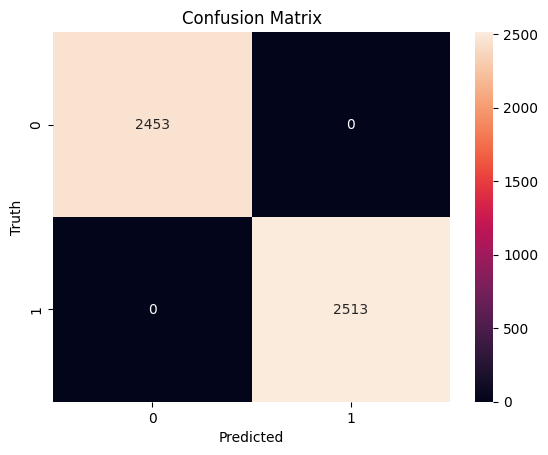

In [34]:
# VIsualize the prediction accuracy using confusion matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
cm=confusion_matrix(y_test,output)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

In [32]:
trainer.save_model("D:/kaggle/Optimised_AI_detect_model")

In [ ]:
print("predictions shape:", predictions.shape)